In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "R:/coding/Disease_Prediction/PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 2152 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [40]:
len(dataset)

68

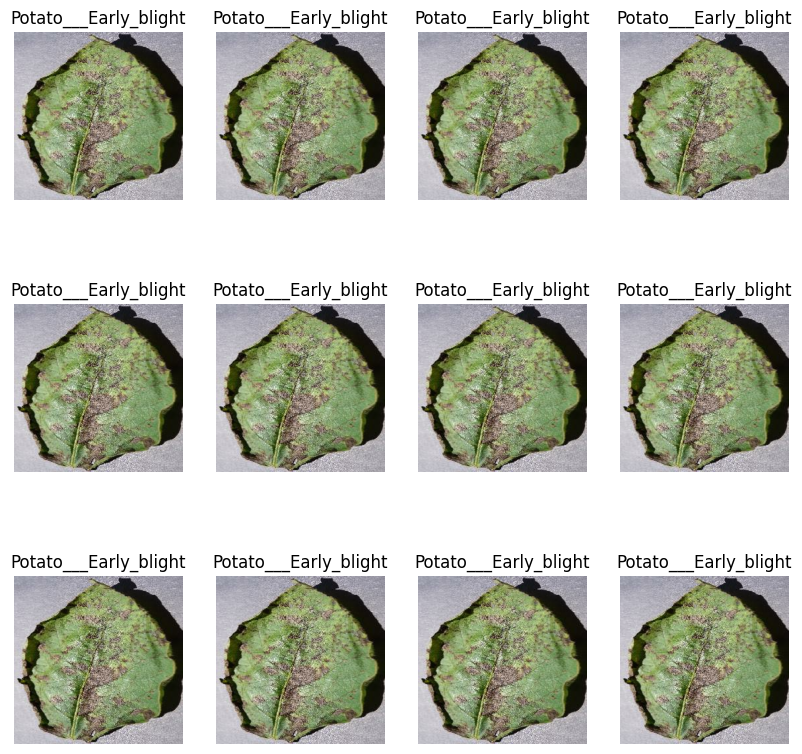

In [41]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)   
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")
     
 

In [42]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [43]:
train_ds = dataset.take(54)
len(train_ds)

54

In [2]:
test_ds = dataset.skip(54)
len(test_ds)

NameError: name 'dataset' is not defined

In [1]:
print(train_ds.class_names)


NameError: name 'train_ds' is not defined

In [45]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [46]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [47]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [48]:
def get_dataset_partition_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:          
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)

    return train_ds, val_ds, test_ds


In [49]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [50]:
len(train_ds)

54

In [51]:
len(test_ds)

8

In [52]:
len(val_ds)

6

In [53]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds= test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [54]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0 / 255)
])


In [55]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2)
])


In [56]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape ),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [57]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [59]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 40s 702ms/step - accuracy: 0.4703 - loss: 0.9375 - val_accuracy: 0.5417 - val_loss: 0.8271
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 624ms/step - accuracy: 0.6179 - loss: 0.7869 - val_accuracy: 0.7917 - val_loss: 0.5010
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 634ms/step - accuracy: 0.7965 - loss: 0.4764 - val_accuracy: 0.7604 - val_loss: 0.5246
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 635ms/step - accuracy: 0.8739 - loss: 0.3128 - val_accuracy: 0.8958 - val_loss: 0.3154
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 635ms/step - accuracy: 0.8987 - loss: 0.2641 - val_accuracy: 0.7917 - val_loss: 0.4238
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 623ms/step - accuracy: 0.8836 - loss: 0.2898 - val_accuracy: 0.8281 - val_loss: 0.4258
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 634ms/step - accuracy: 0.9178 - loss: 0.2261 - val_accuracy: 0.9479 - val_loss: 0.1612
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 635ms/step - accuracy: 0.9173 - loss: 0.2064 - val_accu

In [1]:
scores = model.evaluate(test_ds)

NameError: name 'model' is not defined

In [61]:
scores

[0.17594192922115326, 0.9375]

In [62]:
history

In [63]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [64]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [65]:
history.history['accuracy']

[0.5063657164573669,
 0.6701388955116272,
 0.8194444179534912,
 0.8836805820465088,
 0.8888888955116272,
 0.8958333134651184,
 0.9085648059844971,
 0.9328703880310059,
 0.9438657164573669,
 0.9421296119689941,
 0.9513888955116272,
 0.9456018805503845,
 0.9484953880310059,
 0.9560185074806213,
 0.9635416865348816,
 0.9751157164573669,
 0.9837962985038757,
 0.9357638955116272,
 0.9473379850387573,
 0.9560185074806213,
 0.9699074029922485,
 0.9820601940155029,
 0.9797453880310059,
 0.9814814925193787,
 0.984375,
 0.9849537014961243,
 0.9866898059844971,
 0.9837962985038757,
 0.9837962985038757,
 0.9895833134651184,
 0.9930555820465088,
 0.9884259104728699,
 0.9699074029922485,
 0.9907407164573669,
 0.9814814925193787,
 0.9884259104728699,
 0.9947916865348816,
 0.9890046119689941,
 0.9918981194496155,
 0.9982638955116272,
 0.9907407164573669,
 0.984375,
 0.9913194179534912,
 0.9930555820465088,
 0.9710648059844971,
 0.9930555820465088,
 0.9953703880310059,
 0.9936342835426331,
 0.984953701

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

first image to predict
actual label: Potato___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
predicted label: Potato___healthy


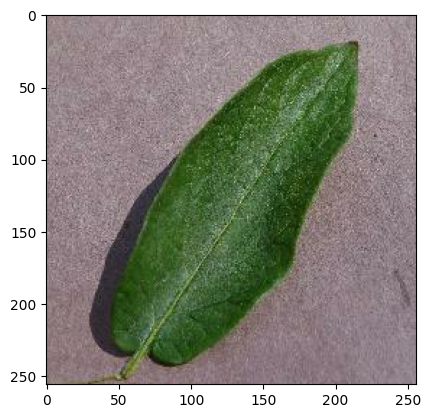

In [67]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [68]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


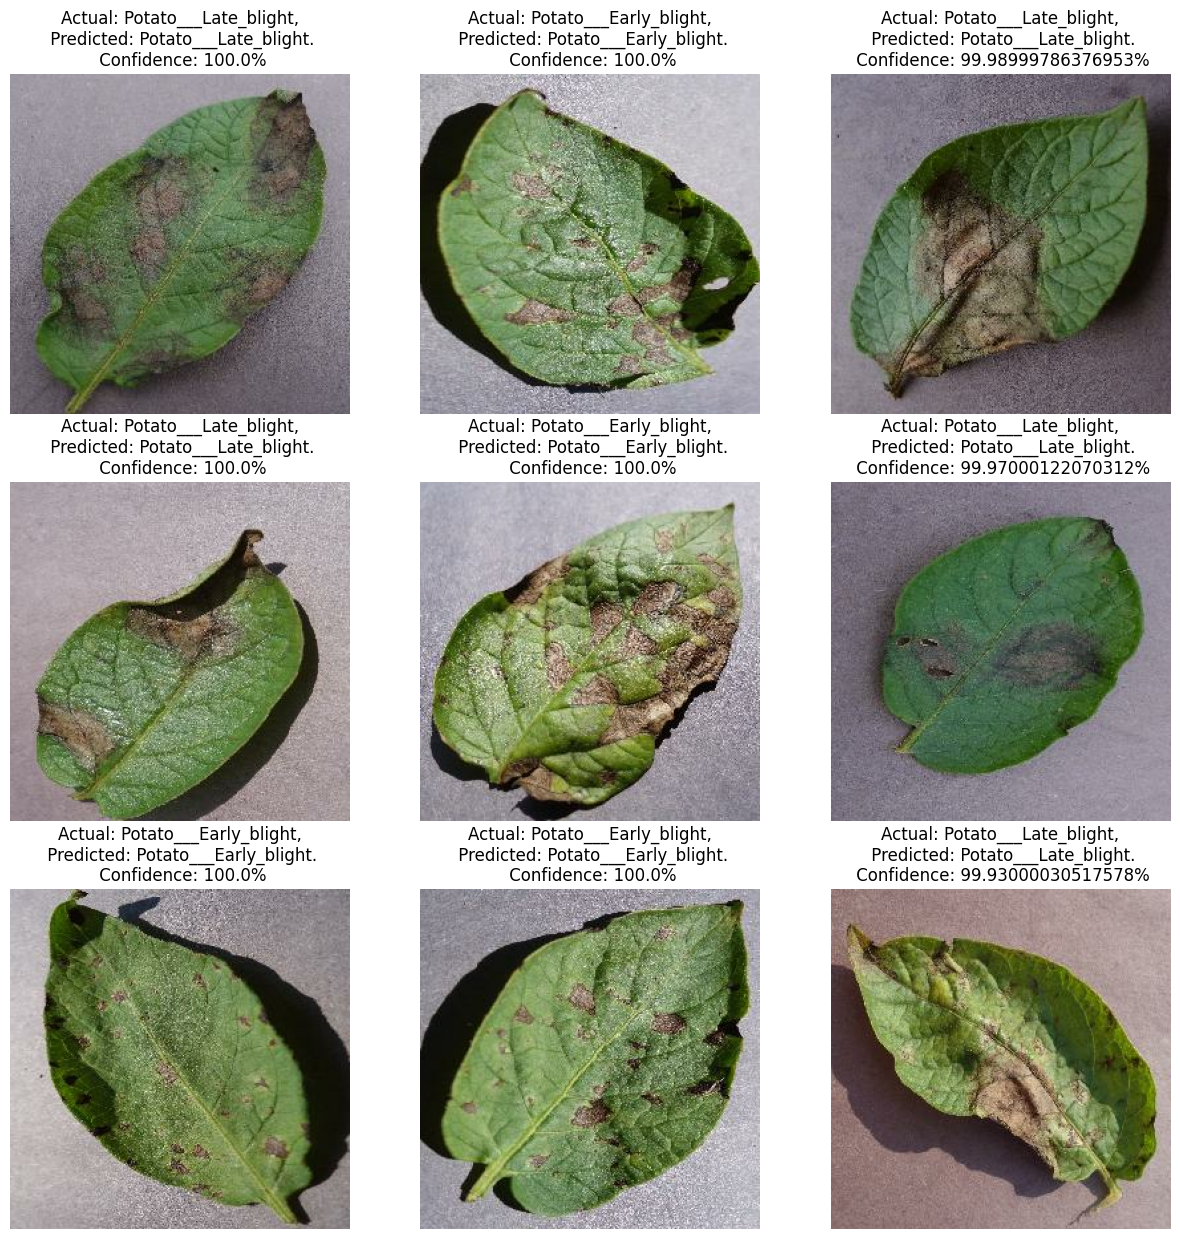

In [69]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [89]:
import tensorflow as tf

model_version = 1
export_path = f"../models/potato_model/{model_version}.h5"

# Save in TensorFlow SavedModel format
tf.saved_model.save(model, export_path)


KeyboardInterrupt: 

In [81]:
import os

# Target model version path
model_dir = "../models/potatoes_model"
os.makedirs(model_dir, exist_ok=True)

# Get numeric folder names only
existing_versions = [
    int(name) for name in os.listdir(model_dir) if name.isdigit()
]

# Safely get the next version
model_version = max(existing_versions, default=0) + 2

# Save the model
model.save(f"{model_dir}/{model_version}.h5")


NameError: name 'model' is not defined